In [28]:
!pip install tensorflow
import tensorflow as tf
tensorflow.__version__
import numpy as np
import pandas as pd
uri = "https://raw.githubusercontent.com/GustavoDuregger/IntroducaoMachineLearningDataScience/master/census.csv"
base = pd.read_csv(uri)

In [2]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
x = base.iloc[:, 0:14].values
y = base.iloc[:, 14].values

In [0]:
#transformação de categorias em numeros
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x[:,1] = label_encoder.fit_transform(x[:,1])
x[:,3] = label_encoder.fit_transform(x[:,3])
x[:,5] = label_encoder.fit_transform(x[:,5])
x[:,6] = label_encoder.fit_transform(x[:,6])
x[:,7] = label_encoder.fit_transform(x[:,7])
x[:,8] = label_encoder.fit_transform(x[:,8])
x[:,9] = label_encoder.fit_transform(x[:,9])
x[:,13] = label_encoder.fit_transform(x[:,13])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size=0.3)

In [15]:
from sklearn.linear_model import LogisticRegression
classificador = LogisticRegression(max_iter = 10000)
classificador.fit(x_treinamento, y_treinamento)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
previsoes = classificador.predict(x_teste)

In [17]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [18]:
y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype=object)

In [19]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.8272085167366158

In [0]:
def converte_classe(rotulo):
  if rotulo == '>50K':
    return 1
  else:
    return 0

In [0]:
base['income']= base['income'].apply(converte_classe)

In [0]:
x = base.drop('income', axis = 1)

In [0]:
y= base['income']

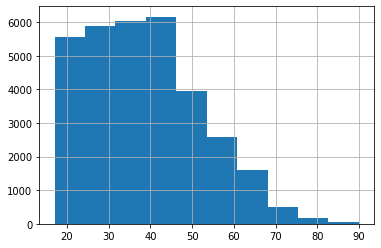

In [25]:
base.age.hist()

In [0]:
idade = tf.feature_column.numeric_column('age')
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=[20,30,40,50,60,70,80,90])]

In [30]:
x.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [0]:
nome_colunas_categoricas =['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']

In [0]:
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key = c, vocabulary_list=x[c].unique())for c in nome_colunas_categoricas]

In [0]:
nome_colunas_numericas = ['final-weight', 'education-num','capital-gain', 'capital-loos', 'hour-per-week']

In [0]:
colunas_numericas = [tf.feature_column.numeric_column(key = c) for c in nome_colunas_numericas]

In [0]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

In [0]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y, test_size=0.3)

In [52]:
x_teste.shape

(9769, 14)

In [0]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = x_treinamento, y=y_treinamento, batch_size=32, num_epochs=None, shuffle=True)

In [0]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

In [55]:
classificador.train(input_fn=funcao_treinamento, steps=10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpc0gpg_0w/mo

In [0]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x=x_teste, batch_size=32, shuffle=False)

In [0]:
previsoes= classificador.predict(input_fn=funcao_previsao)

In [58]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpc0gpg_0w/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.], dtype=float32),
  'logits': array([-71125.98], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.], dtype=float32),
  'logits': array([-14303.186], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.], dtype=float32),
  'logits': array([-6344.7856], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([

In [59]:
previsoes_final = []
for p in classificador.predict(input_fn=funcao_previsao):
  previsoes_final.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpc0gpg_0w/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [0]:
previsoes_final

In [61]:
from sklearn.metrics import accuracy_score
taxa_acerto= accuracy_score(y_teste, previsoes_final)
taxa_acerto

1.0